# Self Organizing Map

## Install MiniSom Package

In [1]:
pip install MiniSom

Note: you may need to restart the kernel to use updated packages.


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [5]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results

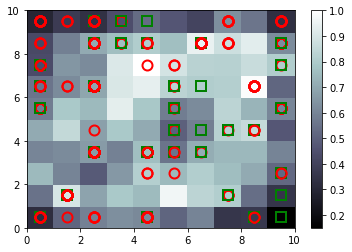

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor='None',
         markersize = 10,
         markeredgewidth=2)
show()

## Finding the frauds

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,7)], mappings[(8,6)]), axis=0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15789865
15594305
15664793
15670029
15763579
15662189
15793825
15696361
15568469
15782159
15586479
15717700
15705379
15750104
15646535
15749964
